In [1]:
# Python standard library

# Scipy
import numpy as np
import scipy.interpolate
import matplotlib.pyplot as plt
%matplotlib inline

# Define pore shape

(-200, 200)

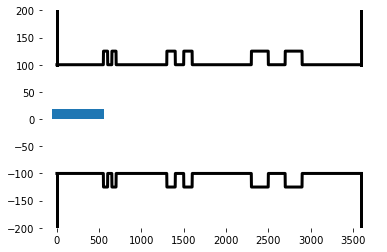

In [25]:
pore_positions = np.linspace(0,1,3600)

undulation_length = 50

pore_diameters = np.empty(pore_positions.shape[0])

L = 3600
D1 = 100
D2 = 125

# Interval 0.5
pore_diameters[0:500] = D1

# Seg 1, 50 nm
pore_diameters[500:550] = D1
pore_diameters[550:600] = D2
pore_diameters[600:650] = D1
pore_diameters[650:700] = D2


# Interval 1.5
pore_diameters[700:1200] = D1

# Seg 2, 100 nm
pore_diameters[1200:1300] = D1
pore_diameters[1300:1400] = D2
pore_diameters[1400:1500] = D1
pore_diameters[1500:1600] = D2

# Interval 2.5
pore_diameters[1600:2100] = D1

# Set 3, 200 nm
pore_diameters[2100:2300] = D1
pore_diameters[2300:2500] = D2
pore_diameters[2500:2700] = D1
pore_diameters[2700:2900] = D2
pore_diameters[2900:3100] = D1

# Interval 3.5
pore_diameters[3100:3600] = D1






    

# Particles

In [51]:
d = 90
l1 = 25
l2 = 50
l3 = 100
l4 = 200
l5 = 400

In [52]:
rho = 1
ls = [25, 50, 75, 100, 125, 150, 175, 200]

dRss = []
for l in ls:
    dRss.append([])
    for i in range(l/2,pore_diameters.shape[0]-l/2):
        
        
        
        dR = 0
        
        for j in range(l):
            dR += (1/((pore_diameters[i-(j-l/2)]/2)**2.-(d/2.)**2.)-1./(pore_diameters[i-(j-l/2)]/2)**2.)
        
        dRss[-1].append(dR)

In [53]:
cmap = plt.get_cmap('viridis')

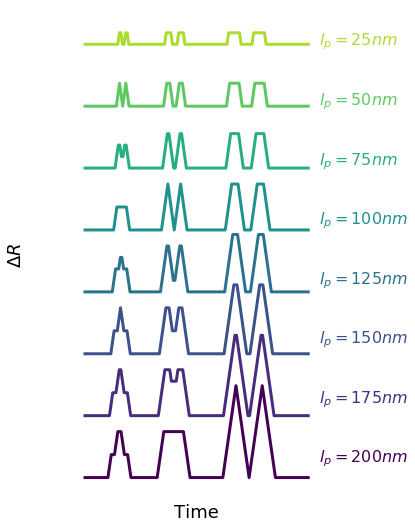

In [54]:
fig = plt.figure(figsize = (6,9))

for i, dRs in enumerate(reversed(dRss)):
    offset = i*0.15
    plt.plot(np.linspace(0, 1, len(dRs)), -1*np.array(dRs) + offset, color = cmap(1.*i/len(dRss)), lw = 3)
    plt.text(1.05, -1*np.mean(dRs)+offset, r'$l_{p}='+str(ls[len(dRss)-i-1])+'nm$', size = 16, ha = 'left', va = 'center', fontweight = 'bold', color = cmap(1.*i/len(dRss)))

plt.xlim(-.25, 1.25)

plt.xlabel('Time', size = 18)
plt.ylabel(r'$\Delta R$', size = 18)
for key in plt.gca().spines:
    plt.gca().spines[key].set_visible(False)
plt.xticks([])
plt.yticks([])

plt.savefig('raw_signals.png', dpi = 100)

plt.show()


# Channel plot

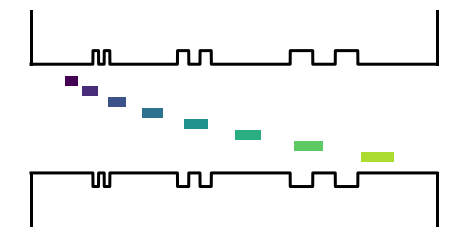

In [57]:
fig = plt.figure(figsize = (8,4))

pore_color = 'k'

plt.plot(pore_diameters, color = pore_color, lw = 3)
plt.plot(-pore_diameters, color = pore_color, lw = 3)

plt.plot([0,0],[-pore_diameters[0],-1000], color = pore_color, lw = 3)
plt.plot([0,0],[pore_diameters[0],1000], color = pore_color, lw = 3)
plt.plot([len(pore_diameters),len(pore_diameters)],[-pore_diameters[0],-1000], color = pore_color, lw = 3)
plt.plot([len(pore_diameters),len(pore_diameters)],[pore_diameters[0],1000], color = pore_color, lw = 3)

for i, l in enumerate(ls):
    if i == 0:
        xoffset = 350
    else:
        xoffset = xoffset + 3*l
    
    plt.plot([xoffset,xoffset+l],[70-20*i,70-20*i], lw = 10, color = cmap(1.*i/len(dRss)))

for key in plt.gca().spines.keys():
    plt.gca().spines[key].set_visible(False)
    
plt.xticks([])
plt.yticks([])

plt.ylim(-200,200)

plt.savefig('rod_in_pore.png', dpi = 100)



In [58]:
cumsum_vec = np.cumsum(np.insert(dRss[0], 0, 0))
window_widths = [l for l in ls[1:]]
ma_vecs = [(cumsum_vec[window_width:] - cumsum_vec[:-window_width]) / window_width for window_width in window_widths]

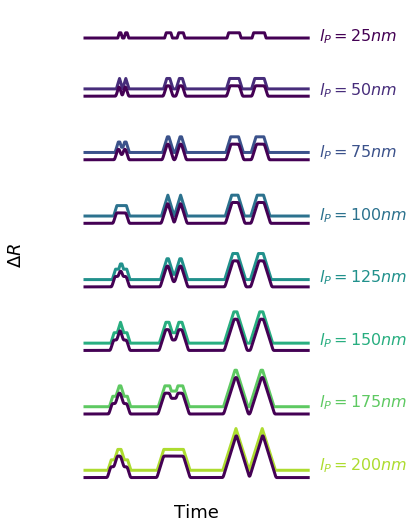

In [59]:
fig = plt.figure(figsize = (6,9))



for i in range(1,len(dRss)):
    
    l = ls[i]
    
    dR0 = np.copy(dRss[0])
    dR = np.copy(dRss[i])
    ma = np.copy(ma_vecs[i-1])
    
    
    
    dR = dR - np.min(dR)
    
    dR0 = dR0 - np.min(dR0)
    dR0 = dR0 * (np.max(dR)/np.max(dR0))
    
    ma = ma - np.min(ma)
    ma = ma * (np.max(dR)/np.max(ma))
    
    # Add offset
    offset = .4#np.max(ma) - np.min(ma)
    minor_offset = .05
    
    dR0 = dR0 + 1*offset
    dR = dR + i*offset
    ma = ma + i*offset + minor_offset
    

    
    
    plt.plot(np.linspace(0, 1, len(dR)),-1*dR, label = r'$\Delta R, L=' + str(l) + r'nm$', lw = 3, color = cmap(1.*i/len(dRss)))
    plt.plot(np.linspace(0, 1, len(ma)),-1*ma, label = r'Smoothed signal', color = cmap(0), lw = 3)
    plt.text(1.05, -1*np.mean(np.hstack((dR,ma))), r'$l_{P}=' + str(ls[i]) + ' nm$', ha = 'left', va = 'center', size = 16, color = cmap(1.*i/len(dRss)), fontweight = 'bold')

    #plt.legend(loc = 'best')
    
    
temp_dR0 = np.copy(dRss[0])
temp_dR0*= -1
plt.plot(np.linspace(0,1,len(dR0)), temp_dR0-offset/5, lw = 3, color = cmap(0))
plt.text(1.05, np.mean(temp_dR0) - offset/5., r'$l_{P}=' + str(ls[0]) + ' nm$', ha = 'left', va = 'center', size = 16, color = cmap(0), fontweight = 'bold')


    
plt.xlabel('Time', size = 18)
plt.ylabel(r'$\Delta R$', size = 18)
plt.xticks([])
plt.yticks([])

plt.xlim(-.25,1.25)

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['left'].set_visible(False)



plt.savefig('moving_averages.png', dpi = 100)


plt.show()
    
